In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [17]:
# Load kddcup data. This was downloaded and placed in the same directory as the notebook.
# For header names, use file we created in the local directory called "kddcup.headers".
df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv', header=0)
df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.000000,Defacement
1,0,4,5,5.500000,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.000000,-1.000000,Defacement
2,0,4,5,5.500000,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.000000,-1.000000,Defacement
3,0,4,12,5.500000,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.000000,-1.000000,Defacement
4,0,4,6,5.500000,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.000000,-1.000000,Defacement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam


In [19]:
# Print the shape of the original data set, for reference
print(f"shape of data set: {df.shape}")

print(df.isna().values.any())
df.dropna(inplace=True)
print(df.isna().values.any())

print(f"shape of data set: {df.shape}")

shape of data set: (18982, 80)
False
False
shape of data set: (18982, 80)


In [20]:
benign_data = df[df['URL_Type_obf_Type'] == "benign"]
phishing_data = df[df['URL_Type_obf_Type'] == "phishing"]

df = pd.concat([benign_data, phishing_data])

In [22]:
n = pd.unique(df['URL_Type_obf_Type'])
n

array(['benign', 'phishing'], dtype=object)

In [21]:
df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
7930,0,2,12,5.500000,8,4.083334,2,15,7,0,...,-1,-1,-1,0.676804,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
7931,0,3,12,5.000000,10,3.583333,3,12,8,2,...,1,0,-1,0.715629,0.776796,0.693127,0.738315,1.00000,-1.000000,benign
7934,19,2,10,6.000000,9,2.250000,2,9,5,0,...,5,4,3,0.747202,0.833700,0.655459,0.829535,0.83615,0.823008,benign
7935,0,2,10,5.500000,9,4.100000,2,15,11,0,...,-1,-1,-1,0.732981,0.860529,-1.000000,-1.000000,-1.00000,-1.000000,benign
7938,0,2,9,2.500000,3,4.555555,2,6,3,0,...,1,0,-1,0.742606,1.000000,0.785719,0.808833,1.00000,-1.000000,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29978,0,2,5,5.500000,8,2.800000,2,5,1,0,...,1,0,-1,0.734789,0.953510,0.693127,1.000000,1.00000,-1.000000,phishing
29986,0,2,5,3.500000,5,3.600000,2,5,2,0,...,1,0,-1,0.793129,0.916667,0.859582,1.000000,1.00000,-1.000000,phishing
29992,0,2,4,7.000000,12,3.000000,2,4,2,0,...,1,0,-1,0.797564,0.918863,0.871049,1.000000,1.00000,-1.000000,phishing
29996,0,3,5,4.666666,10,2.000000,3,3,2,0,...,1,0,-1,0.758084,0.906250,0.833333,1.000000,1.00000,-1.000000,phishing


In [23]:
# Print the shape of the original data set, for reference
print(f"shape of data set: {df.shape}")

# Set the feature set (X) to columns 0-40 of the data set. Set the headers of the feature set using the
# file we imported above.
X = df.drop(columns=df.columns[-1], 
        axis=1, 
        inplace=False)
print(f"shape of X: {X.shape}")

# Create an ndarray "y_raw" with the target labels from column 41 of the data set. Call it "y_raw" as we
# will encode it to create our target array y.
y = df.iloc[:, -1].values
print(f"shape of y: {y.shape}")
print()

#Print the number of records of each class
from collections import Counter
class_counts = Counter(y)
print("Count of records of each type:")
for c in class_counts:
    print(f"{c}: {class_counts[c]}")

shape of data set: (6723, 80)
shape of X: (6723, 79)
shape of y: (6723,)

Count of records of each type:
benign: 2709
phishing: 4014


In [24]:
# Create an ndarray "y_raw" with the target labels from column 41 of the data set. Call it "y_raw" as we
# will encode it to create our target array y.
y = df.iloc[:, -1].values
print(f"shape of y: {y.shape}")
print()

#Print the number of records of each class
from collections import Counter
class_counts = Counter(y)
print("Count of records of each type:")
for c in class_counts:
    print(f"{c}: {class_counts[c]}")

shape of y: (6723,)

Count of records of each type:
benign: 2709
phishing: 4014


In [40]:
for d in range(1,7):
    for crit in ("gini", "entropy"):
        clf = DecisionTreeClassifier(random_state=0, max_depth=d, criterion = crit)
        clf.fit(X, y)
        score = clf.score(X, y)
        print(f"criterion: {crit:8}  depth: {d}  score: {score:.4f}")

criterion: gini      depth: 1  score: 0.7958
criterion: entropy   depth: 1  score: 0.7958
criterion: gini      depth: 2  score: 0.8788
criterion: entropy   depth: 2  score: 0.8788
criterion: gini      depth: 3  score: 0.9102
criterion: entropy   depth: 3  score: 0.9102
criterion: gini      depth: 4  score: 0.9307
criterion: entropy   depth: 4  score: 0.9234
criterion: gini      depth: 5  score: 0.9540
criterion: entropy   depth: 5  score: 0.9454
criterion: gini      depth: 6  score: 0.9594
criterion: entropy   depth: 6  score: 0.9548


In [41]:
clf = DecisionTreeClassifier(random_state=0, max_depth=2, criterion = "gini")
clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [42]:
export_graphviz(clf, out_file='tree.dot', feature_names = X.columns,
                class_names = np.unique(y),
                rounded = True, proportion = False, precision = 2, filled = True)

In [43]:
!dot -Tpng tree.dot -o tree.png -Gdpi=600

In [44]:
#Print the number of records of each class
from collections import Counter
class_counts = Counter(y)
print("Count of records of each type:")
for c in class_counts:
    print(f"{c}: {class_counts[c]}")

Count of records of each type:
benign: 2709
phishing: 4014


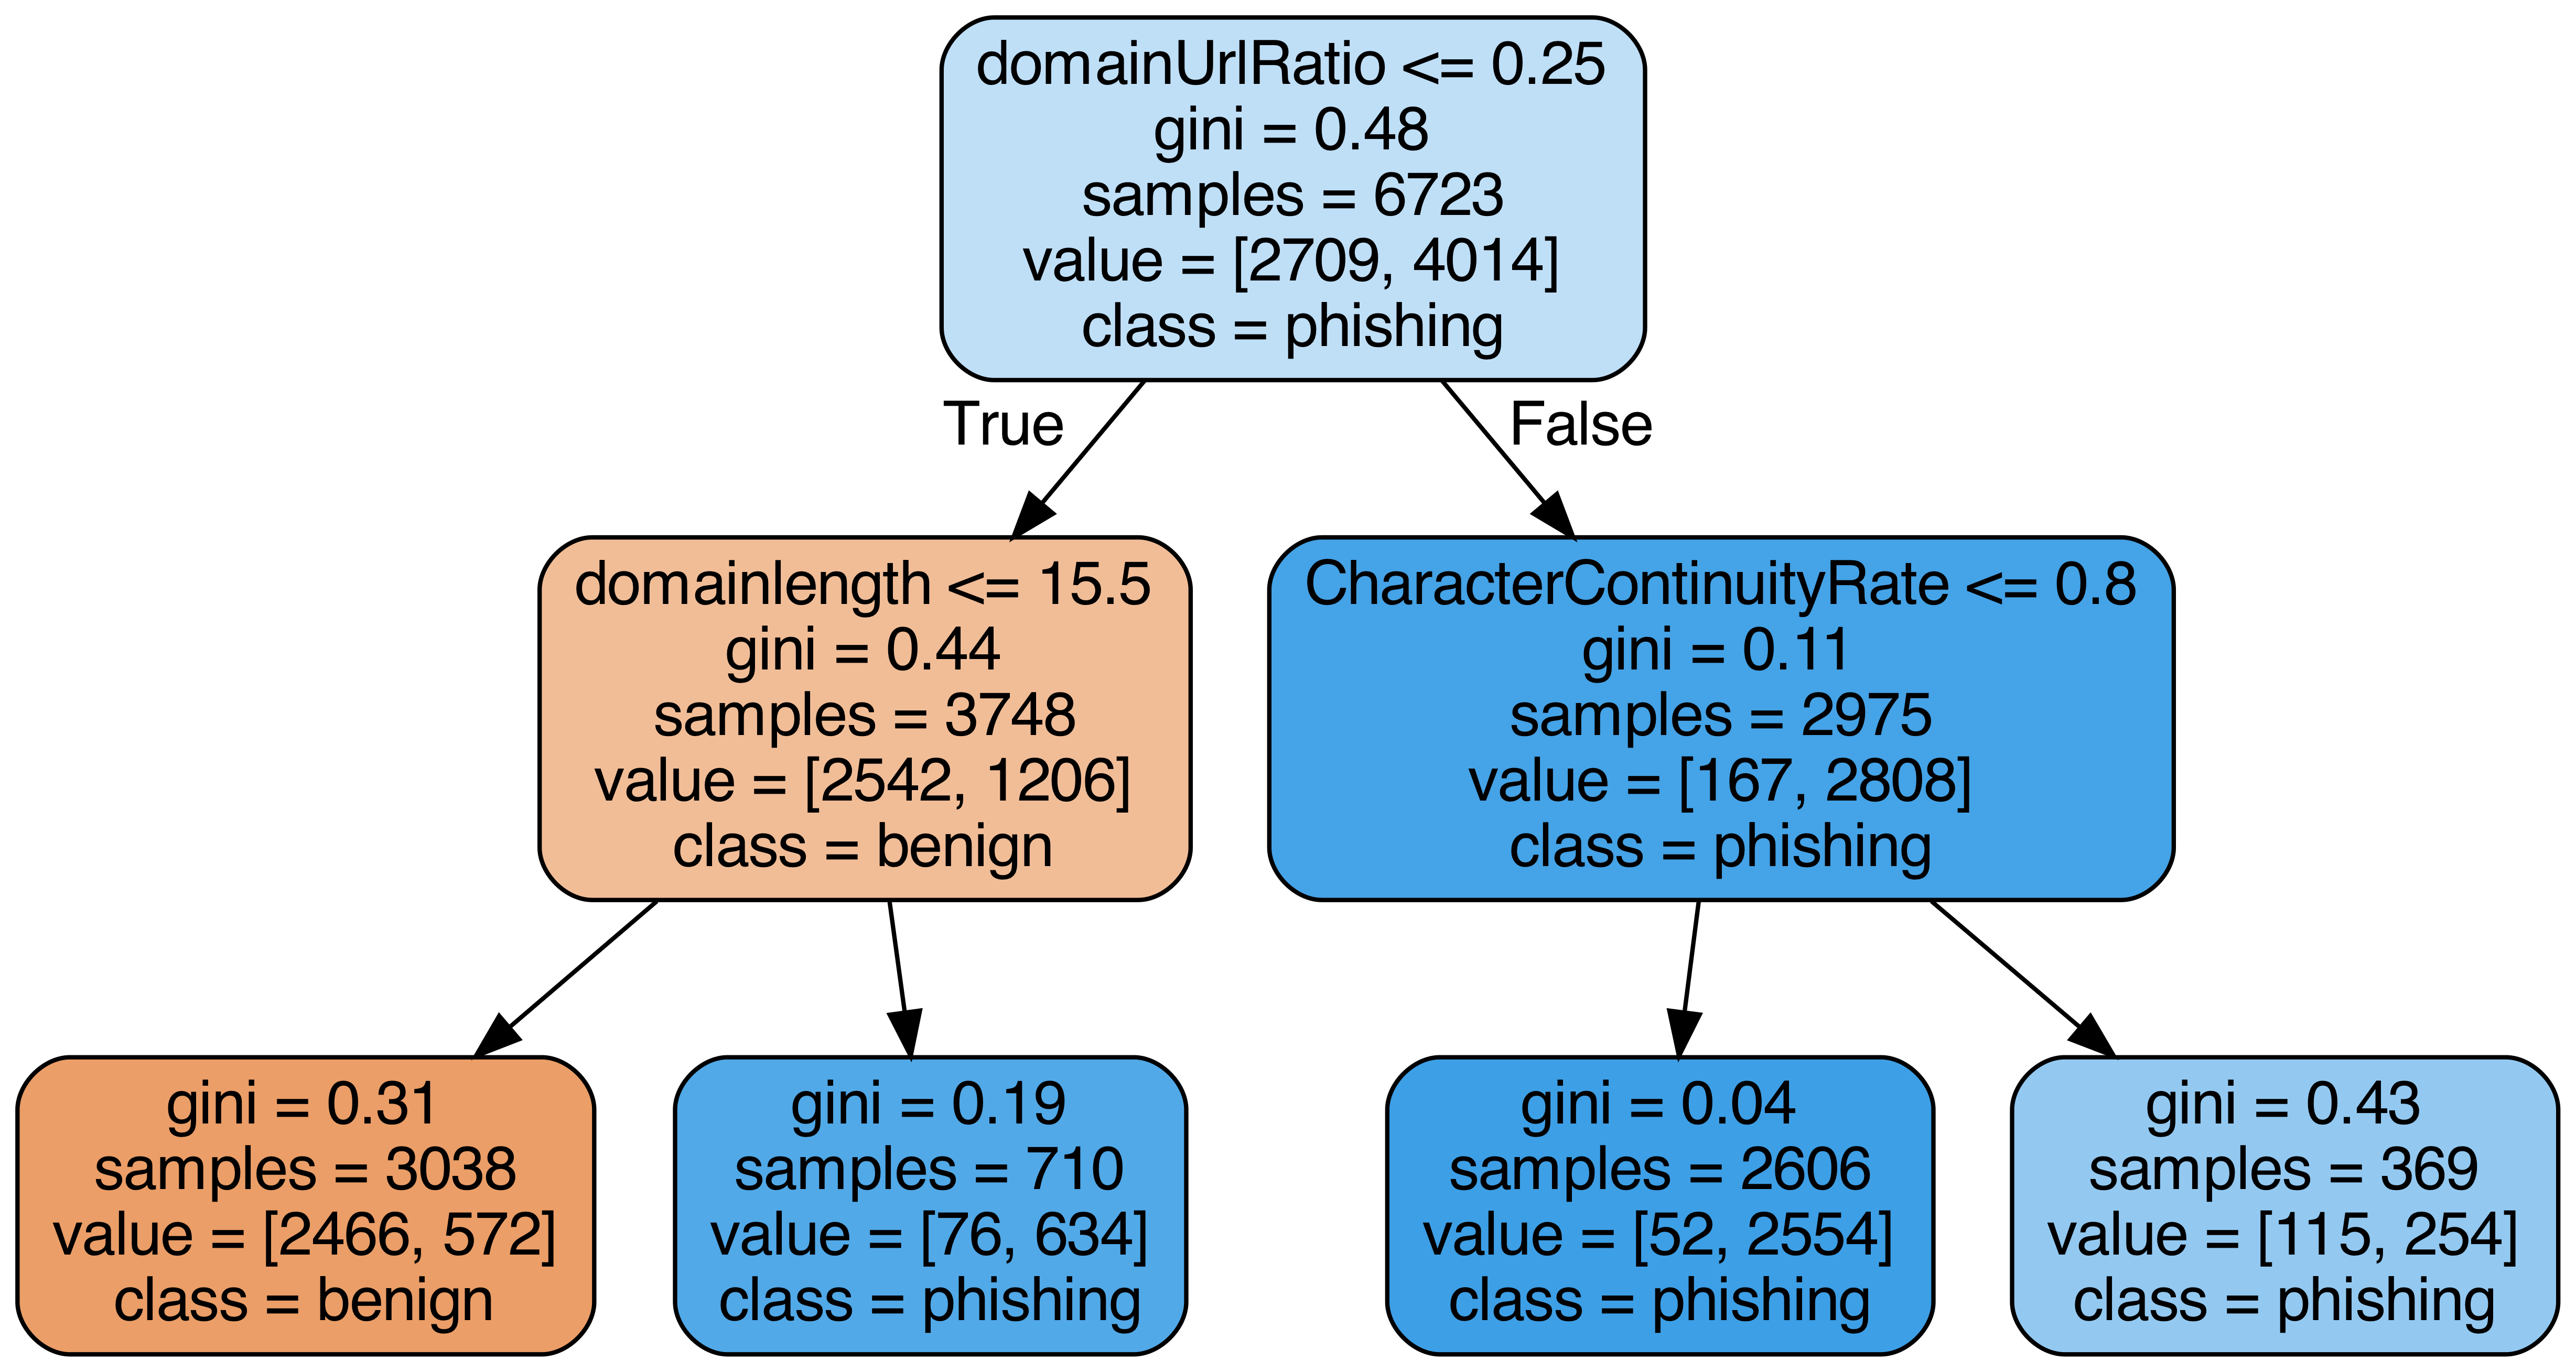

In [45]:
from IPython.display import Image
Image(filename = 'tree.png')